## Apple Stock price prediction for next 30 days

In [163]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
# read dataset
df= pd.read_csv('D:/ML_learning/apple_stock.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [165]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [166]:
# we will use only one feature which is important for prediction

df1 = df.reset_index()['close']

In [167]:
df1.shape

(1258,)

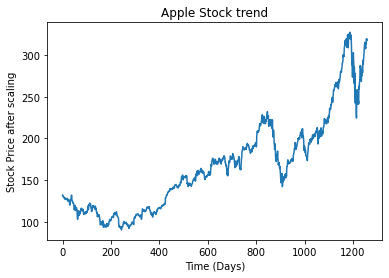

In [168]:
# plotting the trend of df1
# plotting the trend of df1
plt.plot(df1)
plt.ylabel("Stock Price after scaling")
plt.xlabel("Time (Days)")
plt.title("Apple Stock trend")
plt.show()

In [169]:
## feature scaling: as LSTM are sensitive to high values. We performed using MinMax scalar
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [170]:
# split data in training and testing 

training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]
print(len(train_data), len(test_data))

817 441


In [171]:
## Preparing the data so that we can fit the LSTM model
# converting an array of values in dataset metrix
import numpy 
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [172]:
# reshape data into X=t,t+1,t+2,t+3 and Y=t+4

look_back = 100
X_train, y_train = create_dataset(train_data, look_back)
X_test, ytest = create_dataset(test_data, look_back)

In [173]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [174]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [175]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### LSTM model creation

In [176]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [220]:
# create and fit the LSTM network
look_back =100
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [221]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_25 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [235]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 75ms/step - loss: 1.5037e-04 - val_loss: 8.5870e-04
Epoch 2/100
12/12 [==============================] - 1s 73ms/step - loss: 1.5733e-04 - val_loss: 0.0012
Epoch 3/100
12/12 [==============================] - 1s 74ms/step - loss: 1.6676e-04 - val_loss: 8.9713e-04
Epoch 4/100
12/12 [==============================] - 1s 73ms/step - loss: 1.5152e-04 - val_loss: 9.7085e-04
Epoch 5/100
12/12 [==============================] - 1s 74ms/step - loss: 1.4751e-04 - val_loss: 8.7622e-04
Epoch 6/100
12/12 [==============================] - 1s 73ms/step - loss: 1.5010e-04 - val_loss: 8.4160e-04
Epoch 7/100
12/12 [==============================] - 1s 73ms/step - loss: 1.4501e-04 - val_loss: 8.2674e-04
Epoch 8/100
12/12 [==============================] - 1s 74ms/step - loss: 1.4152e-04 - val_loss: 8.5982e-04
Epoch 9/100
12/12 [==============================] - 1s 74ms/step - loss: 1.6137e-04 - val_loss: 0.0014
Epoch 10/100
12/12 [================

In [236]:
# Now, let’s make predictions and visualize the time series trends by using the matplotlib

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [237]:
# transform back to original form
# scalar = MinMaxScaler(feature_range=(0,1))
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [238]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.3970782323118

In [239]:
math.sqrt(mean_squared_error(ytest,test_predict))

238.06865479428868

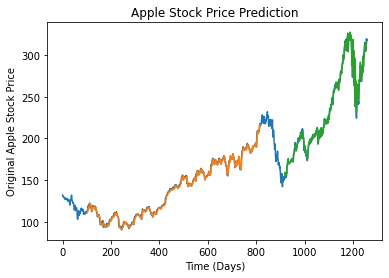

In [240]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel('Original Apple Stock Price')
plt.show()

### Make predictions for next 30 days

In [241]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [242]:
# creating data for prediction
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [243]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [244]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95151967]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [245]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [246]:
len(df1)

1258

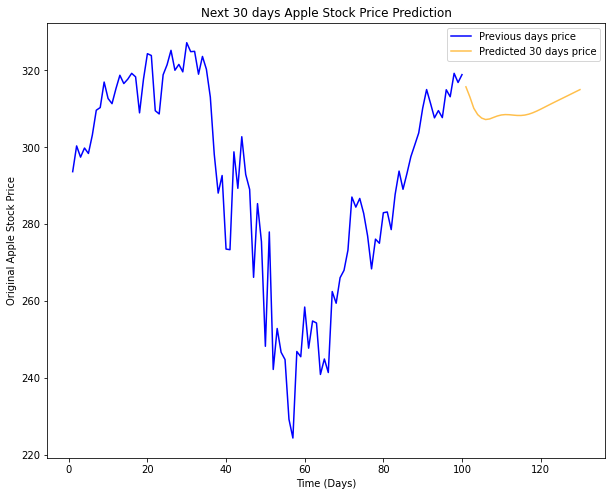

In [252]:
plt.figure(figsize=(10,8))
plt.plot(day_new,scalar.inverse_transform(df1[1158:]), color = 'blue', label = 'Previous days price')
plt.plot(day_pred,scalar.inverse_transform(lst_output), color = 'orange',alpha=0.7, label = 'Predicted 30 days price')
plt.title('Next 30 days Apple Stock Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel('Original Apple Stock Price')
plt.legend()
plt.show()